## AIDI 1002 ASSIGNMENT 1
## AUTHOR: AHMAD SAYEB

In [245]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing

### Question1

In [139]:
def load_csv(path: str) -> 'dataframe':
    '''
    Loads csv into a dataframe
    
    Args:
        path: path to the csv file
    
    Returns:
        dataframe, loaded csv file
    '''
    df = pd.read_csv(path)
    print('description: \n', df.describe)
    print('data types: \n', df.dtypes)
    print('size of data: \n', df.shape)
    return pd.read_csv(path)


def imputer(df: 'dataframe', col: str):
    '''
    Imputes nan values with the mean of the column
    
    Args:
        df: dataframe
        col: targeted column
    
    '''
    print(f'imputing {col}...')
    col_mean = df[col].mean()
    df[col].fillna(col_mean, inplace=True)


def shapiro_normality_test(
    df: 'dataframe', 
    col: str, 
    alpha: float
) -> float:
    '''
    provides shapiro normality test
    
    Args:
        df: dataframe
        col: targeted column
    
    Returns:
        W: calculated shapiro test value
        p: p-value
    
    '''
    W, p = shapiro(df[col].values)
    if p > alpha:
        print('Failed to reject Null Hypothesis. Sample is Guassian')
    else:
        print('Rejected Null Hypothesis. Sample is not Guassian')
    
    return W,p


def dist_plot_test(df: 'dataframe'):
    '''
    Histogram of all the numerical columns
    
    Args:
        df: dataframe
        
    '''
    temp_df = df.select_dtypes('float')
    length = len(temp_df.columns.to_list())
    fig, axes = plt.subplots(1, length, figsize=(8, 4), sharey=True)
    fig.suptitle('Column Distributions')
    for i, col in enumerate(temp_df.columns):
        if df[col].dtypes == 'float64':
            print(col)
            sns.histplot(ax=axes[i], data=df[col])
            axes[i].set_title(col)

            
def qq_plot_test(df: 'dataframe'):
    '''
    Q-Q plot of all numerical columns
    
    Args:
        df: dataframe
        
    '''
    temp_df = df.select_dtypes('float')
    length = len(temp_df.columns.to_list())
    fig, axes = plt.subplots(1, length, figsize=(8, 4), sharey=True)
    fig.suptitle('Columns Q-Q Plot')
    for i, col in enumerate(temp_df.columns):
        if df[col].dtypes == 'float64':
            sm.qqplot(ax=axes[i], line='q',data=df[col])
            axes[i].set_title(col)
    
    
def cat_encoding(df: 'dataframe', col: str):
    '''
     Applies label encoding for the categorical column
     
     Args:
         df: dataframe
         col: target column
    '''
    print(f'lable encoding {col}...')
    label_encoder = preprocessing.LabelEncoder()
    df[col] = df[[col]].apply(label_encoder.fit_transform)
    
    
def normalize(df: 'dataframe', col: str):
    '''
    Normalizes the independent columns
    
    Args:
        df: dataframe
        col: target column
    '''
    
    print(f'normalizing {col}...')
    values = df[col].values
    min_max_scaler = preprocessing.MinMaxScaler()
    values_scaled = min_max_scaler.fit_transform(values.reshape(-1,1))
    df[col] = values_scaled


In [146]:
df = load_csv("noisy_data.csv")

description: 
 <bound method NDFrame.describe of    Region   Age   Income Online Shopper
0   India  49.0  86400.0             No
1  Brazil  32.0  57600.0            Yes
2     USA  35.0  64800.0             No
3  Brazil  43.0  73200.0             No
4     USA  45.0      NaN            Yes
5   India  40.0  69600.0            Yes
6  Brazil   NaN  62400.0             No
7   India  53.0  94800.0            Yes
8     USA  55.0  99600.0             No
9   India  42.0  80400.0            Yes>
data types: 
 Region             object
Age               float64
Income            float64
Online Shopper     object
dtype: object
size of data: 
 (10, 4)


In [147]:
df

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


Handling missing values. this function replaces missing values with Mean. This is peformed on columns that are numerical and contains Nan

In [149]:
# performing imputation for columns that contains Nan
# This functions
imputer(df, 'Age')
imputer(df, 'Income')
df

imputing Age...
imputing Income...


,Region,Age,Income,Online Shopper
0,India,49.000000,86400.000000,No
1,Brazil,32.000000,57600.000000,Yes
2,USA,35.000000,64800.000000,No
3,Brazil,43.000000,73200.000000,No
4,USA,45.000000,76533.333333,Yes
5,India,40.000000,69600.000000,Yes
6,Brazil,43.777778,62400.000000,No
7,India,53.000000,94800.000000,Yes
8,USA,55.000000,99600.000000,No
9,India,42.000000,80400.000000,Yes


Applying normality tests. For this I have used Shapiro Normality Test as its suitable for samples less than 50. The null hypothesis is that the distribution is Normal. In other words there is no difference between our distribution and a normal distribution. We use Shapiro score and p-value to decide that. If we have desired p-value but Shapiro score is below a cretain thresold, we may reject the hypothesis without refering to p-value. We also performed some visualizing tests like Q-Q plot and Distribution Plot. The sample is very small hence Distribution Plot is not that helpful. However from Q-Q plot we can see that most of the data are around mean hence we say "Failed to Reject Null Hypothesis"

In [155]:
print('Shapiro test for age')
print(shapiro_normality_test(df, 'Age', 0.05))
print('-----'*10)
print(shapiro_normality_test(df, 'Income', 0.05))

Shapiro test for age
Failed to reject Null Hypothesis. Sample is Guassian
(0.9711921811103821, 0.9016733765602112)
--------------------------------------------------
Failed to reject Null Hypothesis. Sample is Guassian
(0.9625768661499023, 0.8148096203804016)


Q-Q and distribution plots. These functions detect the numerical columns and plot them!

Age
Income


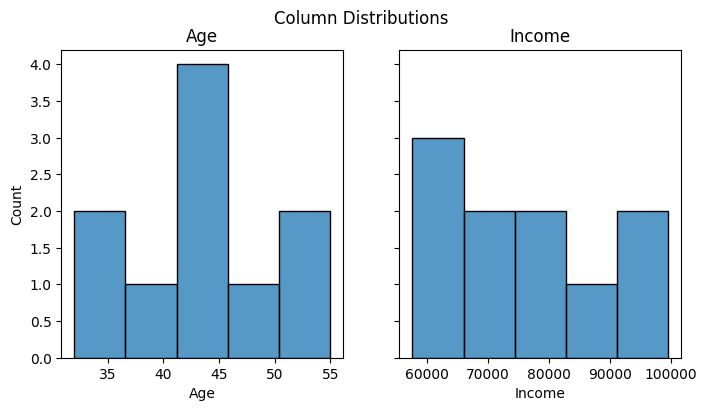

In [159]:
dist_plot_test(df)

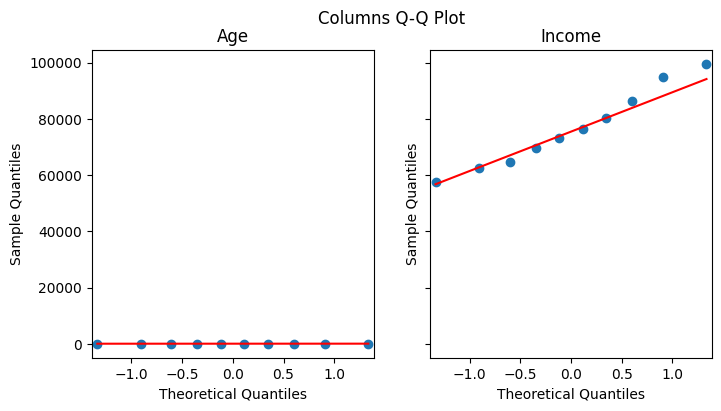

In [160]:
qq_plot_test(df)

Applying Label encoding to categorical columns and normalizing numerical data

In [163]:
cat_encoding(df, 'Region')
cat_encoding(df, 'Online Shopper')
normalize(df, 'Age')
normalize(df, 'Income')

lable encoding Region...
lable encoding Online Shopper...
normalizing Age...
normalizing Income...


In [164]:
df

,Region,Age,Income,Online Shopper
0,1,0.739130,0.685714,0
1,0,0.000000,0.000000,1
2,2,0.130435,0.171429,0
3,0,0.478261,0.371429,0
4,2,0.565217,0.450794,1
5,1,0.347826,0.285714,1
6,0,0.512077,0.114286,0
7,1,0.913043,0.885714,1
8,2,1.000000,1.000000,0
9,1,0.434783,0.542857,1


### Question 2

In [103]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 
# from nltk.corpus import wordnet
# from nltk.corpus import words
# from collections import Counter

In [134]:
def read_txt(path: str) -> str:
    '''
    Reads the text file and returns the value in one string
    
    Args:
        path: path to the file
        
    Returns: a string that contains text from file
    '''
    
    print('loading the file...')
    with open(path, 'r') as file:
        data = file.read().replace('\n', '')
    return data


def lower_case(text: str) -> str:
    '''
    changes the words to lower case
    
    Args:
        text: targeted string
    
    Returns: lowered case string
    '''
    
    print('applying lower case functions...')
    return text.lower()


def remove_punc(text: str) -> str:
    '''
    Removes punctuations using Regex
    
    Args:
        text: targeted string
        
    Returns: text withtout punctuations
    '''
    
    print('removing punctuations...')
    return re.sub(r'[^\w\s]', '', text)


def tokenize_word_tok(text: str) -> list:
    '''
    Tokenize your text using word_tokenize
    
    Args:
        text: targeted string
    
    Returns: array of tokenized words
    
    '''
    
    return word_tokenize(text)


# Note: regexpression was used from the follwoing link
# https://www.nltk.org/_modules/nltk/tokenize/regexp.html
def tokenize_regexp(text: str) -> list:
    '''
    Tokenize your text using regexp
    
    Args:
        text: targeted string
    
    Returns: arrya of tokenized words
    '''
    return RegexpTokenizer('\s+', gaps=True).tokenize(text)

def remove_stop(text: str):
    '''
    Removes stops words, excluding negative words like
    don't, doesn't, can't and ... .
    
    Args:
        text: targeted string
    
    Returns: text without stop words
    
    '''
    
    ##words we remove from stop_words list
    negative_words = [
            "doesn't",
            "doesn",
            "aren",
            "shant",
            "neednt",
            "shouldn",
            "mustn",
            "aren't",
            "needn't",
            "shouldnt'",
            "wouldn't",
            "don't",
            "isn't",
            "didn't",
            "couldn't",
            "mustn't",
            "haven't",
            "hasn't",
            "aren't",
        ]
    
    stop_words = set(stopwords.words('english')) - set(negative_words)
    no_stop_word = []
    for word in text:
        if word not in stop_words:
            no_stop_word.append(word)
    return no_stop_word


def extract_year(text: str) -> list:
    '''
    Extracts years from the text
    
    Args:
        text: targeted text
    
    Returns: list of extracted years
    
    '''
    
    return re.findall('(\d{4})', text)

In [94]:
# Loading text
text = read_txt("wiki.txt")
print(text)

loading the file...
The history of NLP generally started in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translation would be a solved problem.[2] However, real progress was much slower, and after the ALPAC report in 1966, which found that ten-year-long research had failed to fulfill the expectations, funding for machine translation was dramatically reduced. Little further research in machine translation was conducted until the late 1980s, when the first statistical machine translation systems were developed.Some notably successful NLP systems developed in the 1960s were SHRDLU, a natural-language system working in restricted

In [97]:
# changing to lower case and 
# removing punctuations
txt_lowerd = lower_case(text)
txt_lwrd_punc_rmvd = remove_punc(txt_lowerd)
print('------' * 10)
print(txt_lwrd_punc_rmvd)
print('------' * 10)

applying lower case functions...
removing punctuations...
------------------------------------------------------------
the history of nlp generally started in the 1950s although work can be found from earlier periods in 1950 alan turing published an article titled computing machinery and intelligence which proposed what is now called the turing test as a criterion of intelligencethe georgetown experiment in 1954 involved fully automatic translation of more than sixty russian sentences into english the authors claimed that within three or five years machine translation would be a solved problem2 however real progress was much slower and after the alpac report in 1966 which found that tenyearlong research had failed to fulfill the expectations funding for machine translation was dramatically reduced little further research in machine translation was conducted until the late 1980s when the first statistical machine translation systems were developedsome notably successful nlp systems deve

**Applying word_tokenizer and stop words removal**

In [135]:
txt_wrd_tknzer = tokenize_word_tok(txt_lwrd_punc_rmvd)
txt_wrd_tknzer_stpwords_rmvd = remove_stop(txt_wrd_tknzer)
print('------' * 10)
print(txt_wrd_tknzer_stpwords_rmvd)
print('------' * 10)

------------------------------------------------------------
['history', 'nlp', 'generally', 'started', '1950s', 'although', 'work', 'found', 'earlier', 'periods', '1950', 'alan', 'turing', 'published', 'article', 'titled', 'computing', 'machinery', 'intelligence', 'proposed', 'called', 'turing', 'test', 'criterion', 'intelligencethe', 'georgetown', 'experiment', '1954', 'involved', 'fully', 'automatic', 'translation', 'sixty', 'russian', 'sentences', 'english', 'authors', 'claimed', 'within', 'three', 'five', 'years', 'machine', 'translation', 'would', 'solved', 'problem2', 'however', 'real', 'progress', 'much', 'slower', 'alpac', 'report', '1966', 'found', 'tenyearlong', 'research', 'failed', 'fulfill', 'expectations', 'funding', 'machine', 'translation', 'dramatically', 'reduced', 'little', 'research', 'machine', 'translation', 'conducted', 'late', '1980s', 'first', 'statistical', 'machine', 'translation', 'systems', 'developedsome', 'notably', 'successful', 'nlp', 'systems', 'devel

**Applying RegexpTokenizer and stop words removal**

In [136]:
txt_rgx_tknzer = tokenize_regexp(txt_lwrd_punc_rmvd)
txt_rgx_tknzer_stopwords_rmvd = remove_stop(txt_rgx_tknzer)
print('------' * 10)
print(txt_rgx_tknzer_stopwords_rmvd)
print('------' * 10)

------------------------------------------------------------
['history', 'nlp', 'generally', 'started', '1950s', 'although', 'work', 'found', 'earlier', 'periods', '1950', 'alan', 'turing', 'published', 'article', 'titled', 'computing', 'machinery', 'intelligence', 'proposed', 'called', 'turing', 'test', 'criterion', 'intelligencethe', 'georgetown', 'experiment', '1954', 'involved', 'fully', 'automatic', 'translation', 'sixty', 'russian', 'sentences', 'english', 'authors', 'claimed', 'within', 'three', 'five', 'years', 'machine', 'translation', 'would', 'solved', 'problem2', 'however', 'real', 'progress', 'much', 'slower', 'alpac', 'report', '1966', 'found', 'tenyearlong', 'research', 'failed', 'fulfill', 'expectations', 'funding', 'machine', 'translation', 'dramatically', 'reduced', 'little', 'research', 'machine', 'translation', 'conducted', 'late', '1980s', 'first', 'statistical', 'machine', 'translation', 'systems', 'developedsome', 'notably', 'successful', 'nlp', 'systems', 'devel

**Extract years using regex**

In [118]:
years = extract_year(text)
print('------' * 10)
print(years)
print('------' * 10)

------------------------------------------------------------
['1950', '1950', '1954', '1966', '1980', '1960', '1964', '1966']
------------------------------------------------------------


**What is the difference**

In [137]:
txt_rgx_tknzer_stopwords_rmvd == txt_wrd_tknzer_stpwords_rmvd

True

In my case the pattern that I chose for my regex exactly matches that of the word tokenizer. Both results are the same. However RegexpTokenizer is a dynamic tokenizer meaning that you have the freedom to choose the regex pattern and tokenize accordingly.

## Question 3

Some of the codes are copied from **My lab works**

In [187]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression, chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectFromModel

In [318]:
def corr_analysis(df: 'dataframe'):
    '''
    
    Description: generates a correlation heatmap and suggests
    columns that can be dropped based on correlation
    Args
        df: dataframe, should only have numeric data
    '''
    
    df_indep = df.loc[:, df.columns!='Price']
    corr = df_indep.corr(method='pearson')
    for col in corr.columns:
        for ind in corr.index:
            if (col != ind) and (corr[col][ind] > 0.5):
                print(f'{col} and {ind} are correlated. you can drop one!')
    f,ax = plt.subplots(figsize=(15, 12))
    ax = sns.heatmap(corr,cmap="YlGnBu", annot=True)
    return corr


def mutual_info(df:'dataframe'):
    '''
    
    Description: applies mutual information technique for 
    feature selection
    Args:
        df: dataframe, should only have numeric data
    '''
    target = df['Price']
    df_indep = df.loc[:, df.columns != 'Price']
    selector = SelectKBest(mutual_info_regression, k=20)
    new_data = selector.fit_transform(df_indep, target)
    mask = selector.get_support()
    new_features = df_indep.columns[mask]
    scores = selector.scores_
    zipped = list(zip(new_features, scores))
    zipped_sort = sorted(zipped, key=lambda x: x[1], reverse=True)
    #ploting the columns and scores
    plt.figure(figsize=(28, 8), dpi=80)
    plt.bar([x[0] for x in zipped_sort], [x[1] for x in zipped_sort])
    plt.title('Mutual Info Importance Graph')
    plt.xlabel('Columns')
    plt.ylabel('Scores')
    plt.show()
    return new_features


def chi_squared(df:'dataframe'):
    '''
    Description: applies mutual information technique for 
    feature selection
    input
        df: dataframe, should only have numeric data
    '''
    target = df['Price']
    df_indep = df.loc[:, df.columns != 'Price']
    selector = SelectKBest(chi2, k=20)
    new_data = selector.fit_transform(df_indep, target)
    mask = selector.get_support()
    scores = selector.scores_
    new_features = df_indep.columns[mask]
    zipped = list(zip(new_features, scores))
    zipped_sort = sorted(zipped, key=lambda x: x[1], reverse=True)
    #ploting the columns and scores
    plt.figure(figsize=(28, 8), dpi=80)
    plt.bar([x[0] for x in zipped_sort], [x[1] for x in zipped_sort])
    plt.title('Chi2 Importance Graph')
    plt.xlabel('Columns')
    plt.ylabel('Scores')
    plt.show()
    return new_features

def random_forest(df: 'dataframe'):
    '''
    Using Random Forest feature selection
    
    Args:
        df: dataframe
    
    '''
    clf = RandomForestRegressor(n_estimators=100)
    df_indep = df.loc[:, df.columns!='Price']
    target = df['Price']
    clf.fit(df_indep, target)
    scores = clf.feature_importances_
    features = df_indep.columns
    zipped = list(zip(features, scores))
    zipped_sort = sorted(zipped, key=lambda x: x[1], reverse=True)
    # zipped_sort = zipped.sort(key=lambda x:x[1])
    plt.figure(figsize=(28, 8), dpi=80)
    plt.bar([x[0] for x in zipped_sort], [x[1] for x in zipped_sort])
    plt.title('Chi2 Importance Graph')
    plt.xlabel('Columns')
    plt.ylabel('Scores')
    plt.show()

In [198]:
df_q3 = load_csv('melb_data.csv')

description: 
 <bound method NDFrame.describe of               Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
0    

**Price is taken as the Target variable**

In [178]:
df_q3.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,1.0,0.0,NaN,NaN,Yarra,-37.8008,144.9973,Northern Metropolitan,4019.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0


**Removing Nulls and replacing them with mean of column for numerical columns. Using Label Encoder for categorical data**

In [199]:
# Extracting numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df_q3 = df_q3.select_dtypes(include=numerics)
cat_df_q3 = df_q3.select_dtypes(exclude=numerics)
print('numerical data columns:\n', num_df_q3.dtypes)
print('------' * 10)
print('categorical data columns:\n', cat_df_q3.dtypes)
print('------' * 10)
# Applying imputer for numerical columns
for col in num_df_q3.columns:
    imputer(df_q3, col)
# Also normalizing numerical columns
for col in num_df_q3.columns:
    if col != 'Price':
        normalize(df_q3, col)
# Applying label encoder for categorical columns
for col in cat_df_q3.columns:
    cat_encoding(df_q3, col)
# printing head
df_q3.head(10)

numerical data columns:
 Rooms              int64
Price            float64
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
Lattitude        float64
Longtitude       float64
Propertycount    float64
dtype: object
------------------------------------------------------------
categorical data columns:
 Suburb         object
Address        object
Type           object
Method         object
SellerG        object
Date           object
CouncilArea    object
Regionname     object
dtype: object
------------------------------------------------------------
imputing Rooms...
imputing Price...
imputing Distance...
imputing Postcode...
imputing Bedroom2...
imputing Bathroom...
imputing Car...
imputing Landsize...
imputing BuildingArea...
imputing YearBuilt...
imputing Lattitude...
imputing Longtitude...
imputing Propertycount...
normalizing Rooms...
n

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,12794,0.111111,0,1480000.0,1,23,45,0.051975,0.068577,...,0.125,0.1,0.000466,0.003414,0.935139,31,0.494755,0.517651,2,0.17616
1,0,5943,0.111111,0,1035000.0,1,23,47,0.051975,0.068577,...,0.125,0.0,0.000360,0.001775,0.856448,31,0.484031,0.513083,2,0.17616
2,0,9814,0.222222,0,1465000.0,3,23,48,0.051975,0.068577,...,0.250,0.0,0.000309,0.003370,0.856448,31,0.482223,0.513997,2,0.17616
3,0,9004,0.222222,0,850000.0,0,23,48,0.051975,0.068577,...,0.250,0.1,0.000217,0.003414,0.935139,31,0.498243,0.516281,2,0.17616
4,0,10589,0.333333,0,1600000.0,4,155,49,0.051975,0.068577,...,0.125,0.2,0.000277,0.003190,0.995134,31,0.484936,0.513723,2,0.17616
5,0,2195,0.111111,0,941000.0,1,106,52,0.051975,0.068577,...,0.125,0.0,0.000418,0.003414,0.935139,31,0.488941,0.514819,2,0.17616
6,0,2142,0.222222,0,1876000.0,1,155,52,0.051975,0.068577,...,0.250,0.0,0.000566,0.004718,0.868613,31,0.491137,0.518474,2,0.17616
7,0,13335,0.111111,0,1636000.0,1,155,56,0.051975,0.068577,...,0.125,0.2,0.000591,0.002404,0.844282,31,0.486486,0.514910,2,0.17616
8,0,11082,0.000000,2,300000.0,1,23,56,0.051975,0.068577,...,0.125,0.1,0.000000,0.003414,0.935139,31,0.493204,0.516646,2,0.17616
9,0,1090,0.111111,0,1097000.0,1,23,56,0.051975,0.068577,...,0.125,0.2,0.000508,0.001685,0.856448,31,0.492946,0.518108,2,0.17616


Rooms and Bedroom2 are correlated. you can drop one!
Rooms and Bathroom are correlated. you can drop one!
Bedroom2 and Rooms are correlated. you can drop one!
Bedroom2 and Bathroom are correlated. you can drop one!
Bathroom and Rooms are correlated. you can drop one!
Bathroom and Bedroom2 are correlated. you can drop one!


,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Suburb,1.000000,0.027335,-0.060510,0.018195,0.016421,0.023240,-0.003511,-0.039550,-0.057947,-0.059578,-0.059516,-0.031209,0.000796,-0.005351,0.014673,0.035157,0.137892,-0.140629,-0.010919,0.142738
Address,0.027335,1.000000,0.020016,-0.069483,0.003562,-0.000806,0.000900,-0.034019,0.001943,0.015854,0.005659,-0.013062,0.004874,0.016078,-0.065673,0.016941,-0.010896,-0.004079,0.005517,0.016331
Rooms,-0.060510,0.020016,1.000000,-0.554141,-0.051368,-0.031054,-0.020722,0.294203,0.055303,0.944190,0.592934,0.407843,0.025678,0.091373,-0.052112,-0.054428,0.015948,0.100771,-0.028661,-0.081530
Type,0.018195,-0.069483,-0.554141,1.000000,0.078432,0.034045,0.012903,-0.234845,0.027420,-0.533994,-0.231465,-0.273001,-0.017725,-0.052744,0.270223,-0.004047,-0.105827,0.007094,0.065048,0.082663
Method,0.016421,0.003562,-0.051368,0.078432,1.000000,-0.005728,-0.007378,-0.052316,-0.016321,-0.049553,-0.003509,-0.022423,0.018041,-0.008783,0.024497,0.025644,-0.000157,-0.036409,0.016837,-0.034055
SellerG,0.023240,-0.000806,-0.031054,0.034045,-0.005728,1.000000,0.000208,0.007584,0.007928,-0.030165,-0.020390,0.011620,-0.002397,0.000748,0.008517,0.016838,-0.032291,-0.043861,0.028686,0.060338
Date,-0.003511,0.000900,-0.020722,0.012903,-0.007378,0.000208,1.000000,-0.011740,0.001577,-0.021638,-0.024481,-0.021369,-0.005921,-0.006940,-0.005850,0.048890,-0.004169,-0.011994,0.008289,-0.002676
Distance,-0.039550,-0.034019,0.294203,-0.234845,-0.052316,0.007584,-0.011740,1.000000,0.431514,0.295927,0.127155,0.262074,0.025004,0.073990,0.193183,-0.084354,-0.130723,0.239425,-0.096808,-0.054910
Postcode,-0.057947,0.001943,0.055303,0.027420,-0.016321,0.007928,0.001577,0.431514,1.000000,0.060584,0.113664,0.050201,0.024558,0.040714,0.025406,0.005085,-0.406104,0.445357,-0.010656,0.062304
Bedroom2,-0.059578,0.015854,0.944190,-0.533994,-0.049553,-0.030165,-0.021638,0.295927,0.060584,1.000000,0.584685,0.404721,0.025646,0.089102,-0.041894,-0.045426,0.015925,0.102238,-0.034797,-0.081350


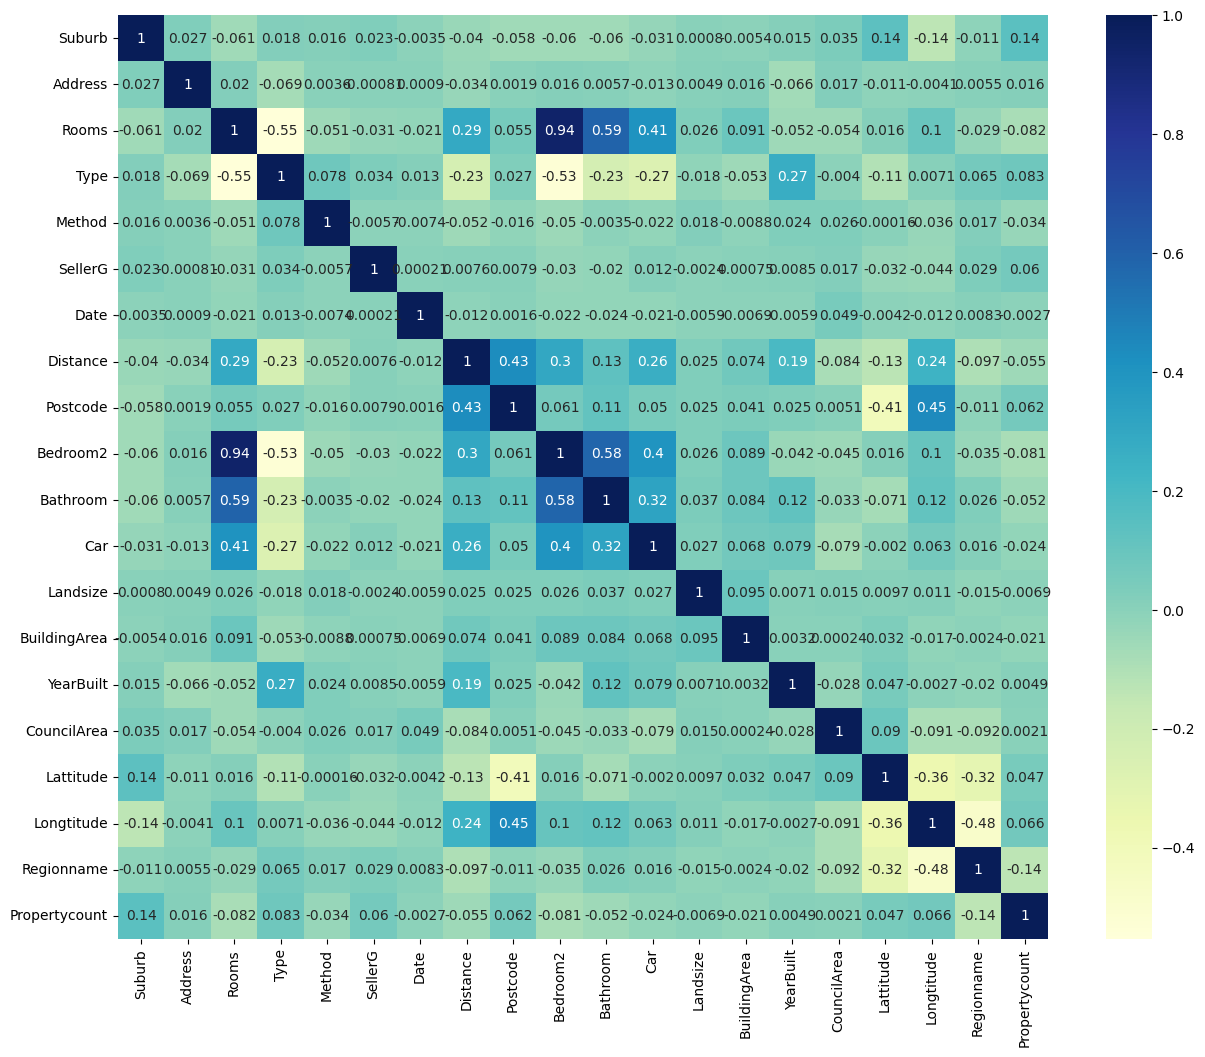

In [184]:
corr_analysis(df_q3)

Index(['Suburb', 'Rooms', 'Distance', 'Postcode', 'Bedroom2'], dtype='object')